## 1. Introduction
Emails are a part of everyday life for millions of people, serving as a primary communication tool in both personal and professional settings. With such a vast amount of data being generated, there’s a huge opportunity to apply clustering techniques to better organize and understand email content. By using unsupervised learning, we can group emails based on patterns like content, intent, and engagement. This allows us to tackle challenges like spam detection, automatically filtering irrelevant messages, and categorizing customer support queries for faster, more efficient responses

 In this project, I am exploring a dataset of emails, which includes a label to identify spam messages. Using unsupervised learning and clustering techniques, I aim to group the emails based on patterns in content, intent, and engagement. To measure the effectiveness of the clustering, I will evaluate the model's performance by comparing it with the existing spam labels, as well as assessing the overall quality of the cluster

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of diferrent categories of data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/data

### *  Download data from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)

Path to dataset files: /Users/tkma56b/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1


In [2]:
import pandas as pd
email_df = pd.read_csv(path +'/emails.csv')
email_df.head()


Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

### * Perform EDA on the  data
* check for any nuls missing values
* Clean the data
* look at the distributions

In [3]:
# check the shape of the data and number of records
# Also check the datatypes
email_df.shape
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
# All numeric and one is the object , and it is email string with id numbers , this is unique and not useful so drop it
cleaned_email_df = email_df.drop('Email No.',axis=1,inplace=False)

In [5]:
#All are numeric data type , now it is time to check for missing data null values 
res = cleaned_email_df.isna().sum().tolist()
for i in res:
    if i >0:
       print(i)

* No nulls but there are zeros if the word is not in email , so it should be fine
* The dataset contains 3,000 features, which makes it a prime candidate for dimensionality reduction. By reducing the number of features, we can streamline the data, allowing the model to run more efficiently, even with limited computational resources.

In [6]:
cleaned_email_df.head()
cleaned_email_df.tail()

the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
5167    2   2    2    3    0   0   32    0    0   5  ...         0    0   
5168   35  27   11    2    6   5  151    4    3  23  ...         0    0   
5169    0   0    1    1    0   0   11    0    0   1  ...         0    0   
5170    2   7    1    0    2   1   28    2    0   8  ...         0    0   
5171   22  24    5    1    6   5  148    8    2  23  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
5167       0    0               0         0         0   0    0           0  
5168       0    0               0         0         0   1    0           0  
5169       0    0               0         0         0   0    0           1  
5170       0    0               0         0         0   1    0           1  
5171       0    0               0         0         0   0    0           0  

[5 rows x 3001 columns]

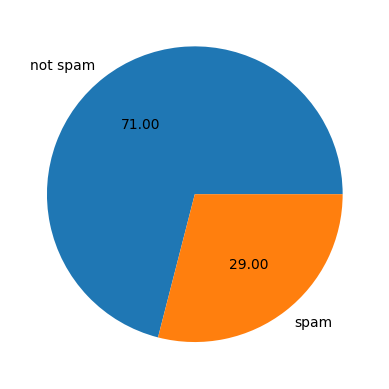

In [7]:
# percent of spam and non spam emails in the list
import matplotlib.pyplot as plt
plt.pie(cleaned_email_df['Prediction'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [8]:
# plot distribution for input columns
def plot_cols(cols):
  for col in cols:
    sns.distplot(cleaned_email_df[col]).set_title(col)
    plt.show()

top 10 features in non spam emails


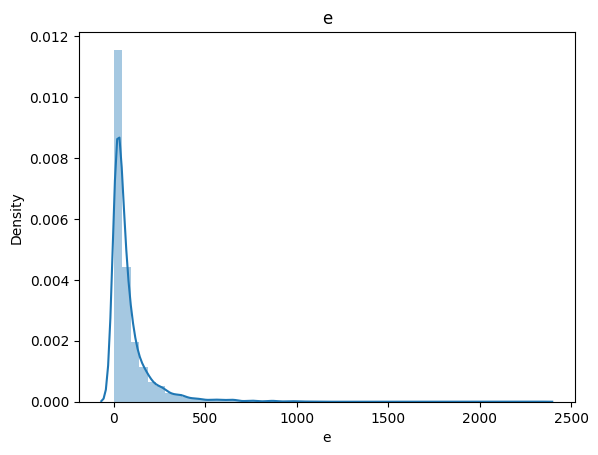

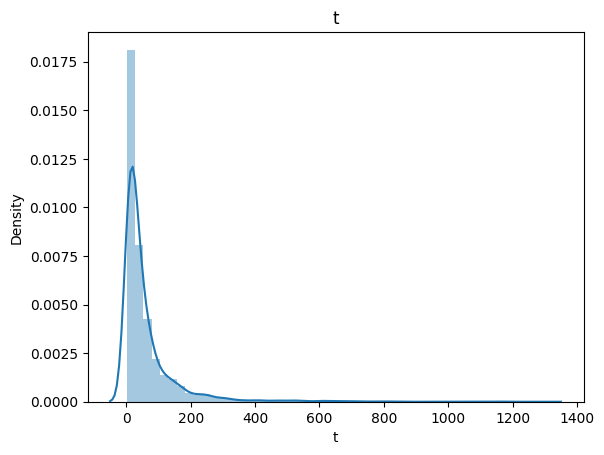

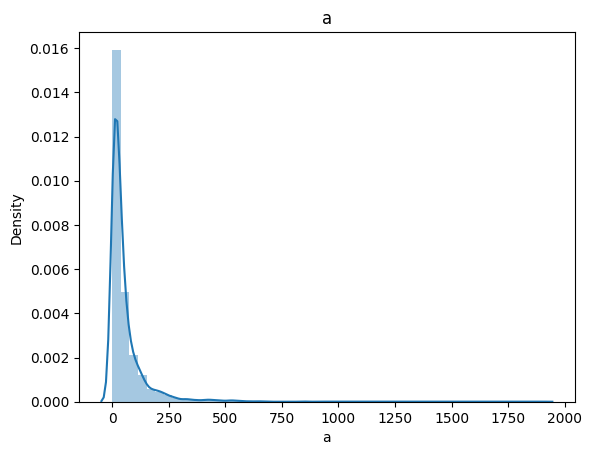

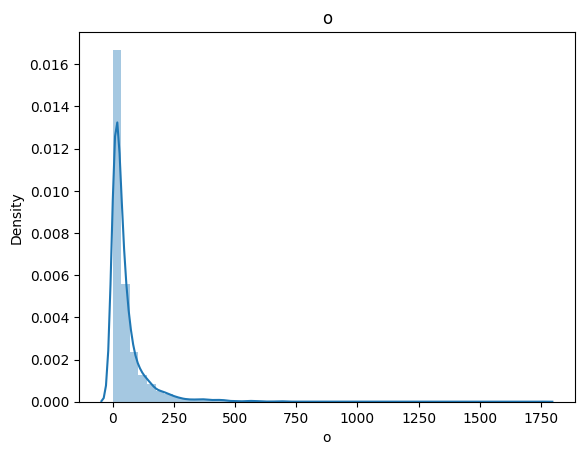

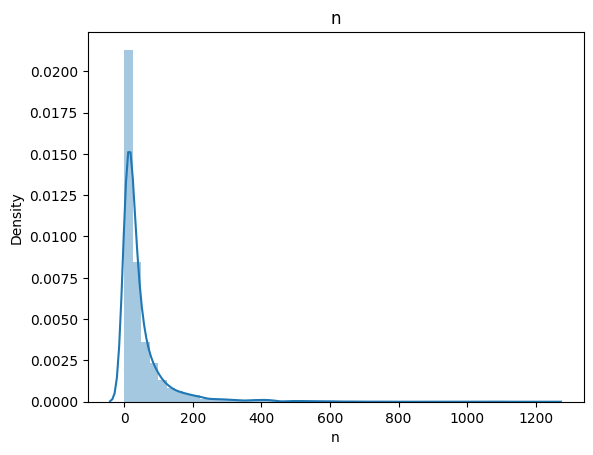

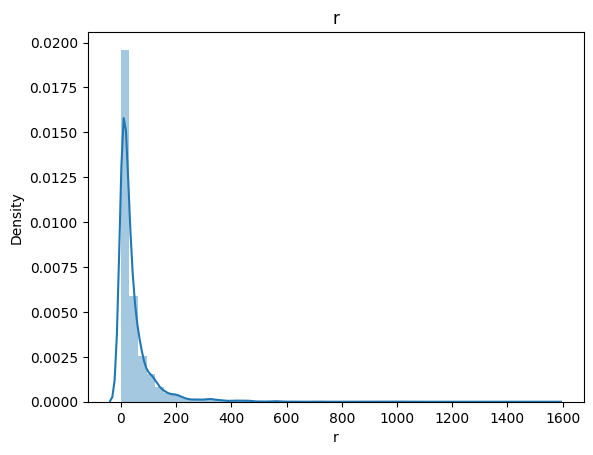

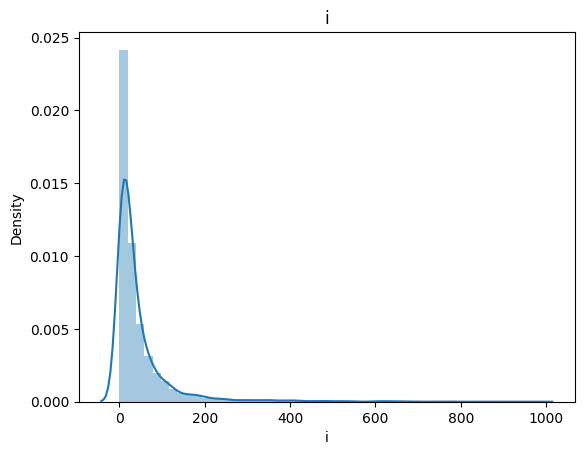

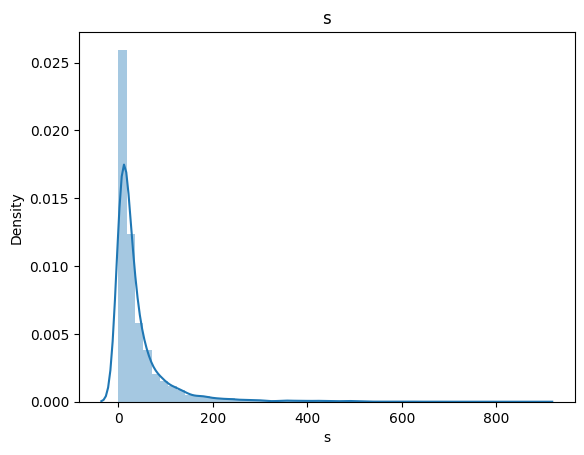

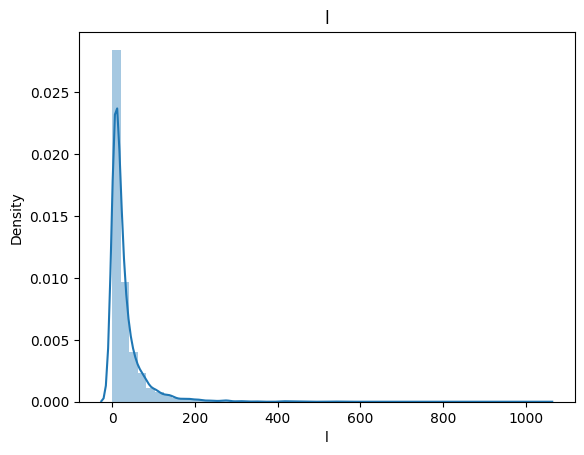

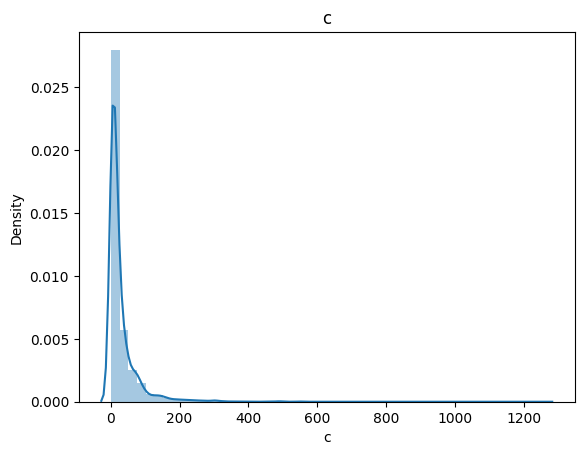

top 10 features in spam emails


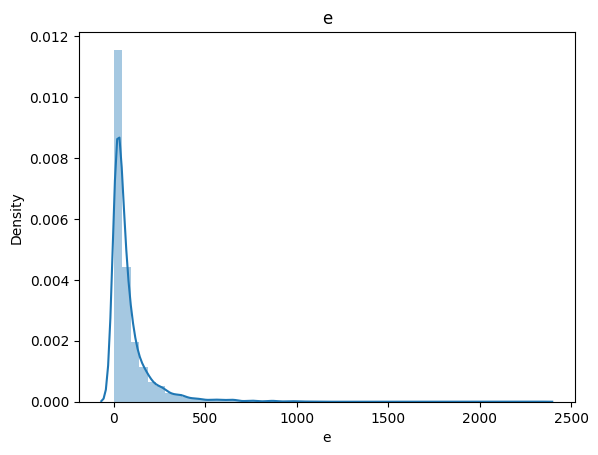

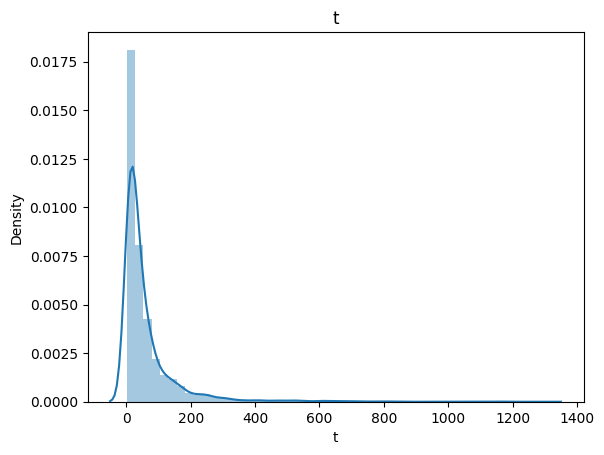

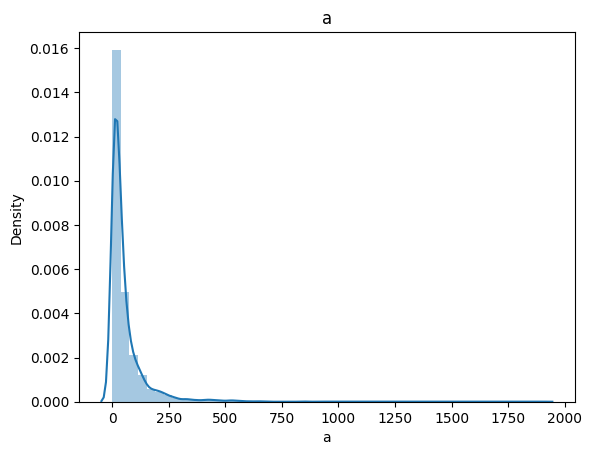

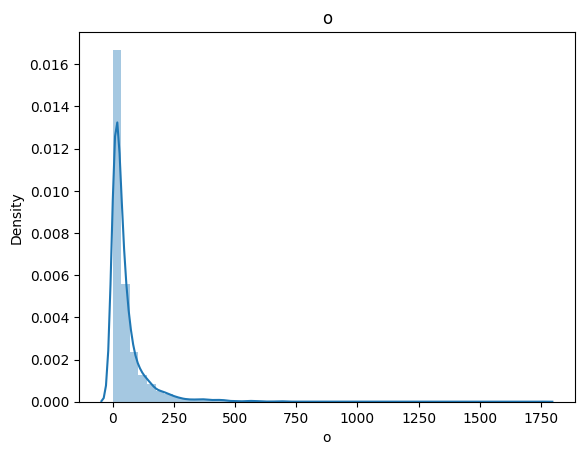

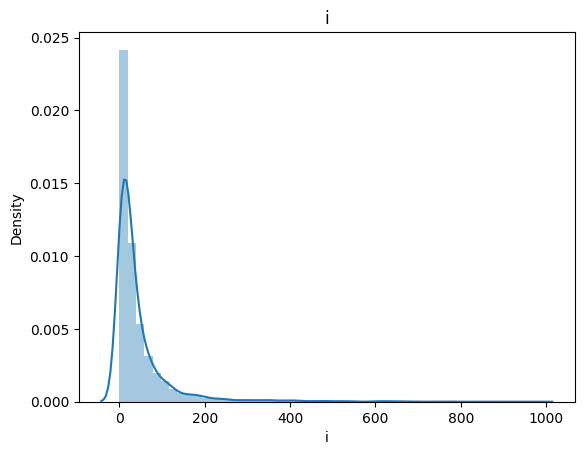

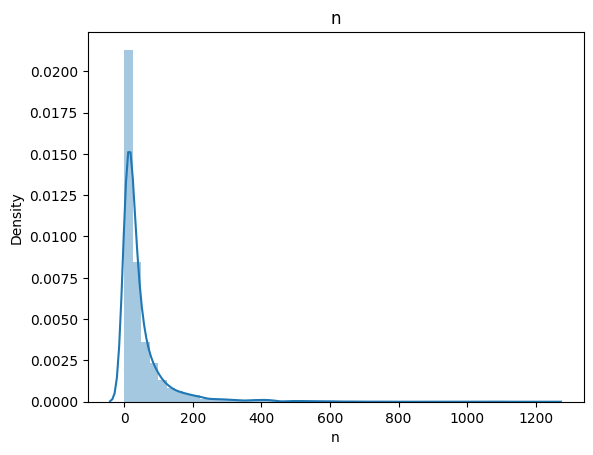

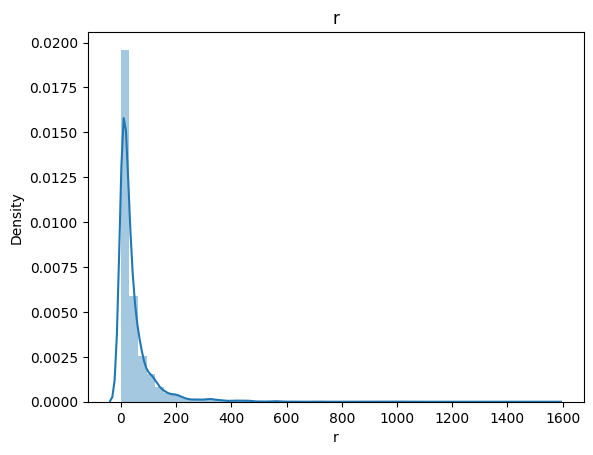

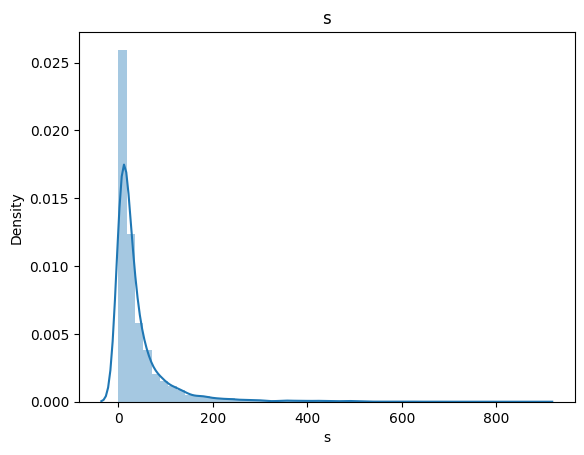

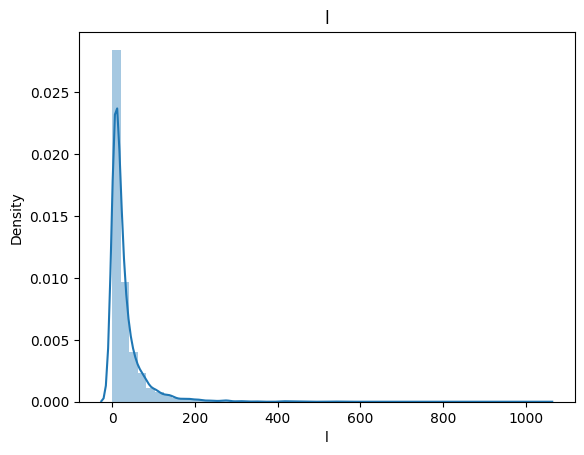

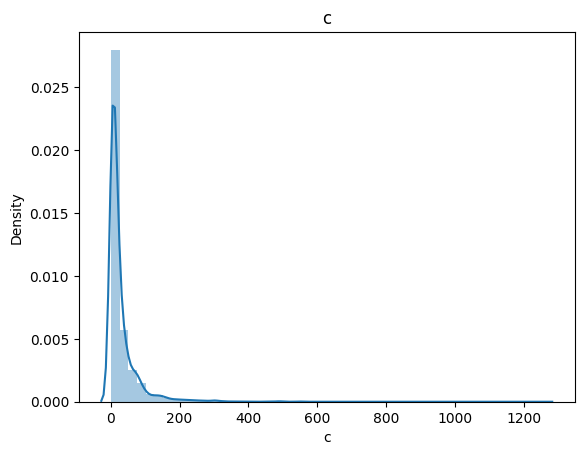

In [10]:
# lets try the top words distributions in spam and non spam emails
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
no_spam_sum = cleaned_email_df[cleaned_email_df['Prediction'] == 0].sum()
# Get the top 10 columns and plot the distributions
print("top 10 features in non spam emails")
top_nospam_words =no_spam_sum.nlargest(10).index
plot_cols(no_spam_sum.nlargest(10).index)
# lets try the top words in spam 
print("top 10 features in spam emails")
spam_sums = cleaned_email_df[cleaned_email_df['Prediction'] == 1].sum()
plot_cols(spam_sums.nlargest(10).index)
top_spam_words =no_spam_sum.nlargest(10).index

#### Data distribution does not look noraml, and it would need feature standardization to be effectively run the models

<Axes: >

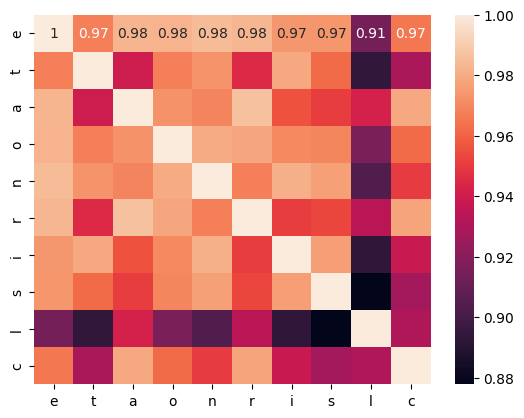

In [11]:
# heat map for top 10 spam words
import seaborn as sns
sns.heatmap(cleaned_email_df[cleaned_email_df['Prediction'] == 1][top_spam_words].corr(),annot=True)

<Axes: >

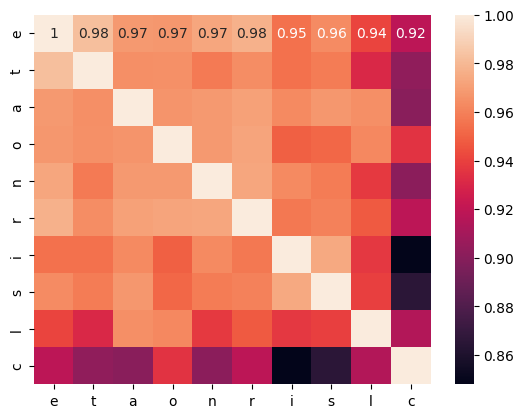

In [12]:
# heat map for top 10 non spam words
import seaborn as sns
sns.heatmap(cleaned_email_df[cleaned_email_df['Prediction'] == 0][top_nospam_words].corr(),annot=True)

## 3 Standardization and Dimensionality reduction
 The dataset contains 3,000 features, which makes it a prime candidate for dimensionality reduction. By reducing the number of features, we can streamline the data, allowing the model to run more efficiently, even with limited computational resources.
* First standardize the dataset
* I will try pca as first and try visualize clusters
* Next try UMAP and visualize the clusters.
* Select the best in both of them


In [13]:
from sklearn.preprocessing import StandardScaler
# Define the features and the outcome
X = cleaned_email_df.iloc[:, :3000]
y = cleaned_email_df.iloc[:, 3000]

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

 PCA explained variance for components: [0.07181724 0.02393477 0.01537363 0.0130559  0.01198735 0.01122416
 0.0099345  0.00954158 0.00848709 0.00789047 0.00732182 0.00705094
 0.0063914  0.00603193 0.00588368]


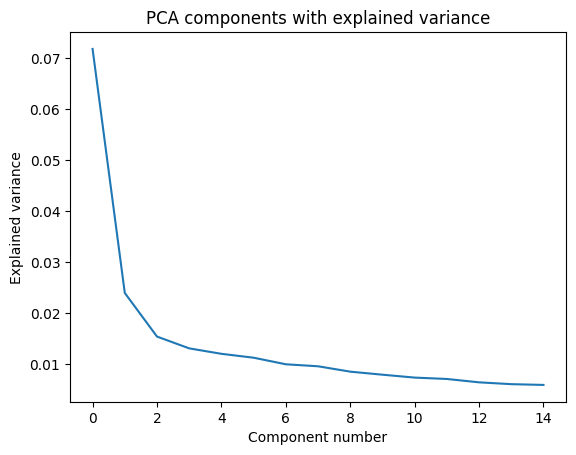

In [14]:
from sklearn.decomposition import PCA
# Try with 5 components and see the explained variance for components
pca = PCA(n_components=15)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)
import matplotlib.pyplot as plt

print(f" PCA explained variance for components: {pca.explained_variance_ratio_}")
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.title('PCA components with explained variance')
plt.show()

In [15]:
# from data above 6 components looks optimal so will go a head with 2 components
pca = PCA(n_components=6)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)
pca_components

[0.07181724 0.02393477 0.01537363 0.01305588 0.01198709 0.01122378]


array([[-8.06981979,  2.85397443, -0.79256502,  0.70652205,  0.63197323,
         0.56553981],
       [ 7.87826973, -4.97638789,  5.97809912,  1.96736524, -3.65690172,
         0.62722566],
       [-7.86609432,  2.73109211, -0.41541689,  0.7321793 ,  0.57479239,
         0.63714595],
       ...,
       [-6.89449669,  3.55580574, -0.64849601,  0.54524498,  0.46124296,
         0.59367446],
       [-2.94454079,  1.35985098, -3.91152358, -1.71056776, -0.79148446,
         0.73964942],
       [11.74343656, -6.12268412,  3.18707074, -2.38289677,  2.79337914,
        -4.99770667]])

In [16]:
# now try umap dimensionality reduction on data
import umap
import time
time_start = time.time()

umap_results = umap.UMAP(n_components=6,
                         n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 7.927077054977417 seconds


In [17]:
def plot_label(components,dtype):
    ''' plot components 
      plot components with color and target labels and colors '''
    plt.figure(figsize=(1, 1))
    plt.text(0.01, 0.01, f" Dimensionality reduction with {dtype}", fontsize=10)
    plt.axis('off')  # Hide the axes
    plt.show()
    plt.figure(figsize=(.75, 0.45))
    if dtype == 'UMAP':
         plt.figure(figsize=(2, 1))
    colours = ["r", "b", "g"]
    for i in range(components.shape[0]):
        plt.text(components[i, 0], components[i, 1], str(y.iloc[i]),
                 color=colours[int(y.iloc[i])],
                 fontdict={'weight': 'bold', 'size': 30}
                 )
    plt.show()


def plot(components,dtype):
    ''' plot components 
      scatter plot components '''
    plt.figure(figsize=(10, 5))
    plt.scatter(components[:, 0], components[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(f" Dimensionality reduction with {dtype}",y=1.05)
    plt.show()

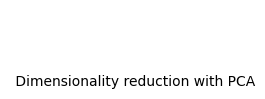

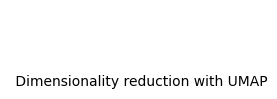

<Figure size 75x45 with 0 Axes>

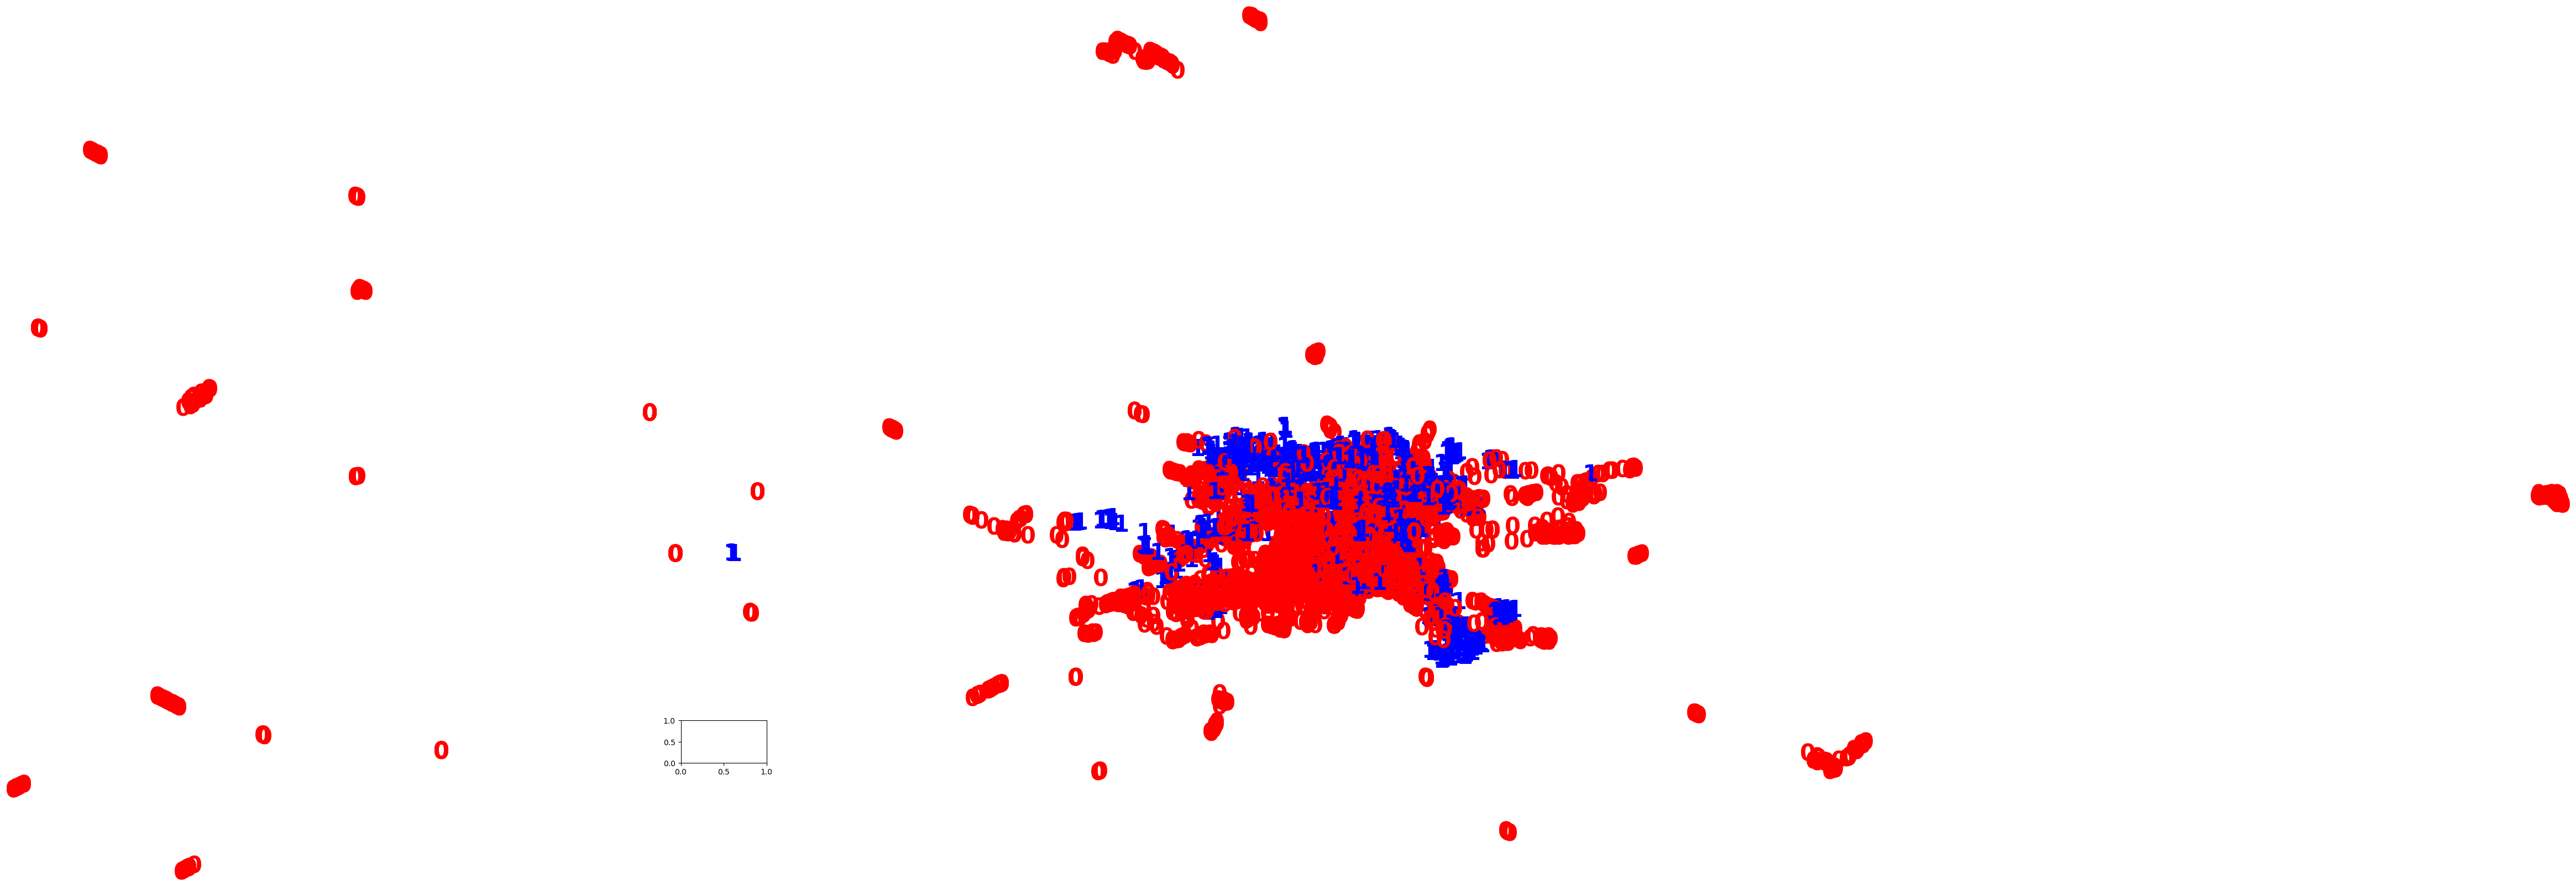

In [18]:
# scatter plot the PCA 
# time to compare PCA and T-SNE
plot_label(pca_components,"PCA")
plot_label(umap_results,"UMAP")

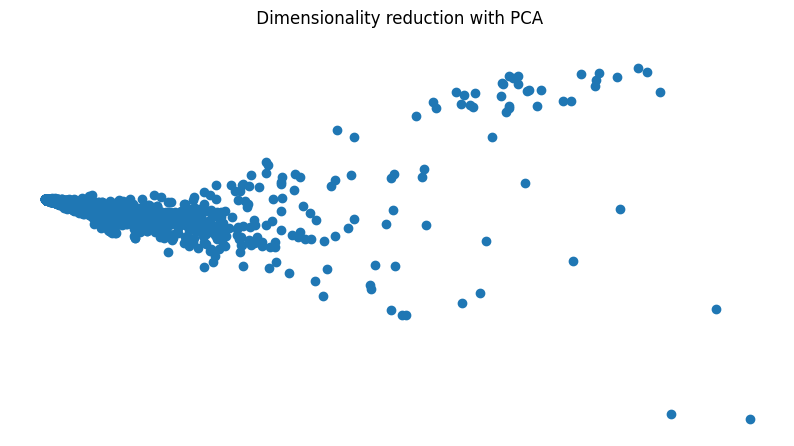

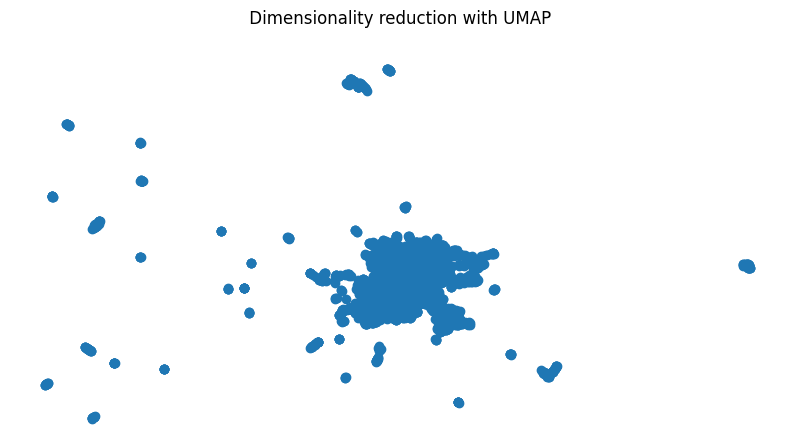

In [19]:
plot(pca_components,"PCA")
plot(umap_results,"UMAP")

##### From above dimensionality reduction it clearly the PCA is seperating spam and non spams better than the UMAP. So will be selection PCA components to cluster the data.

In [20]:
components=pca_components

## 4 . Clustering the data
* I will apply simple k means to cluster the data and see performanace
* I will apply Gaussian mixture soft clustering algorithm and measure the performance 

In [21]:
from sklearn.cluster import KMeans
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(components)
y_pred = kmeans_cluster.predict(components)

177 ms ± 89.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
def plot_pred(components,y_pred):
 plt.figure(figsize=(2,1))
 colours = ['r','b','g']
 for i in range(components.shape[0]):
    plt.text(components[i, 0], components[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

In [40]:
components.shape
plot_pred(components,y_pred)

In [41]:
pd.crosstab(y,y_pred)

col_0          0    1
Prediction           
0           3583   89
1           1386  114

In [46]:
from sklearn import  metrics
model_stats = []
print('silhouette_score:',metrics.silhouette_score(X, y_pred, metric='euclidean'))
print('random index:' , metrics.rand_score(y,y_pred))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))
model_stats.append([metrics.silhouette_score(X_std, y_pred, metric='euclidean'),
                metrics.rand_score(y,y_pred),
                metrics.adjusted_rand_score(y,y_pred)]
              )

silhouette_score: 0.8191943884564642
random index: 0.592208271395161
adjusted random index: 0.040920108499185634


In [43]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(components)

In [44]:
plot_pred(components,clusters)

In [47]:
print('silhouette_score:',metrics.silhouette_score(X, clusters, metric='euclidean'))
print('random index:' , metrics.rand_score(y,clusters))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,clusters))
model_stats.append([metrics.silhouette_score(X_std, clusters, metric='euclidean'),
                metrics.rand_score(y,clusters),
                metrics.adjusted_rand_score(y,clusters)]
              )

silhouette_score: 0.6573338646641546
random index: 0.5584744207500243
adjusted random index: 0.04464780020437956


In [48]:
# select 2 clusters for spam detection and tune on covariance_type
for covariance_type in ['full','tied','diag','spherical']:
 # Defining the agglomerative clustering
 gmm_cluster = GaussianMixture(covariance_type=covariance_type,
                               n_components=2, random_state=123)
 # Fit model
 %timeit clusters = gmm_cluster.fit_predict(umap_results)
 print(f'covariance_type is {covariance_type}')
 print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
 print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

38 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
covariance_type is full
Adjusted Rand Index of the GMM solution: 0.04464780020437956
The silhouette score of the GMM solution: 0.4357024853259348
21.6 ms ± 6.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
covariance_type is tied
Adjusted Rand Index of the GMM solution: 0.04464780020437956
The silhouette score of the GMM solution: 0.4357024853259348
6.72 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
covariance_type is diag
Adjusted Rand Index of the GMM solution: 0.04464780020437956
The silhouette score of the GMM solution: 0.4357024853259348
8.1 ms ± 370 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
covariance_type is spherical
Adjusted Rand Index of the GMM solution: 0.04464780020437956
The silhouette score of the GMM solution: 0.4357024853259348


   From above covariance_type tuning , there is no improvement in the model and the score remains same

### 5. Model performance


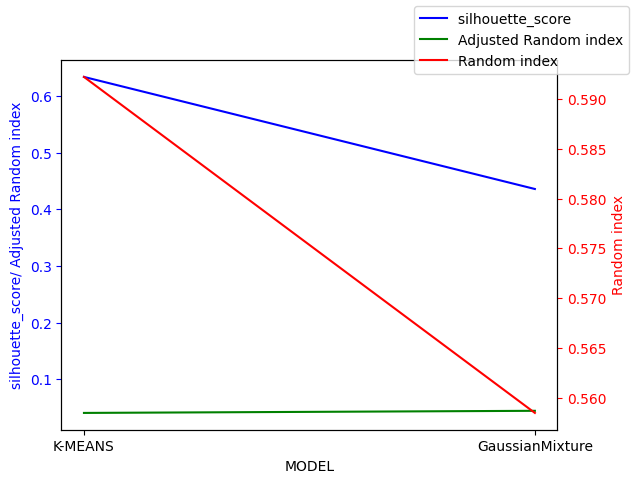

In [52]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first y-axis
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][0],model_stats[1][0]], 'b-', label='silhouette_score ')
ax1.set_xlabel('MODEL')
ax1.set_ylabel('silhouette_score/ Adjusted Random index', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][1],model_stats[1][1]], 'r-', label='Random index')
ax2.set_ylabel('Random index', color='r')
ax2.tick_params('y', colors='r')
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][2],model_stats[1][2]], 'g-', label='Adjusted Random index')

fig.legend()
plt.show()


#### comparison summary
 Both models run on the data which got dimensionality reduced using PCA. 
*  k-MEANS performance is with silhouette_score 0.819, RI at 0.59 and ARI at 0.04 where as the GaussianMixture performance is silhouette_score 0.65, RI at 0.55 and ARI at 0.04. Both models are stron and able to cluster the spam and non spam emails using the data. 
*  From this the k-MEANS is performing better with the clustering of the emails for spam detections.
*  I have selected a dataset with available labels, which makes it particularly interesting to evaluate the performance of supervised learning techniques. Given the results, further exploration using supervised learning approaches is recommended to fully assess the predictive capabilities of the model on this data.

## 6. Conclusion 

After analyzing the email data and running through different unsupervised learning models, I came up with the K-means model for clustering technique and PCA algorithm to reduce the dimension of the data. The model performance is good for clustering the data 
with silhouette_score 0.819, RI at 0.59 and ARI at 0.04. 

Since the dataset already includes labels, we can also explore supervised learning models to enhance our analysis. By comparing the performance of different models, we can identify the best-performing one, taking both model accuracy and the specific use cases of stakeholders into account.
